In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

import tensorflow as tf

import plotly.express as px

import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)


KeyboardInterrupt: 

In [2]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: >

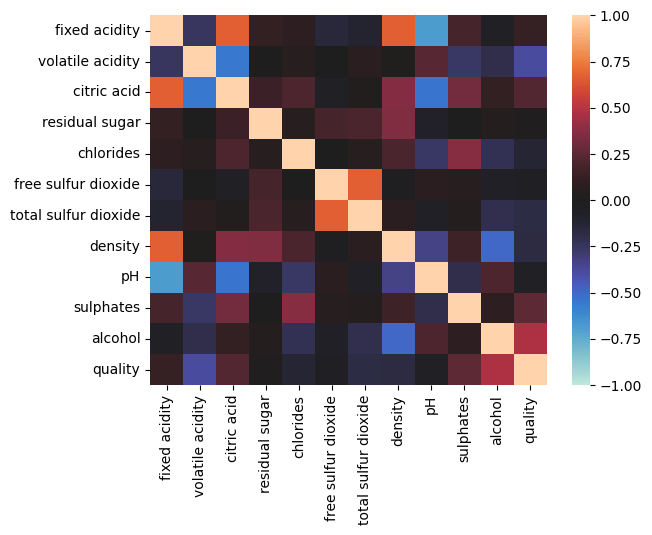

In [4]:
sns.heatmap(df.corr(), vmin = -1, center = 0, vmax = 1)

In [11]:
train, valid, test = np.split(df, [int(.7*len(df)), int(.9*len(df))])

In [12]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1114,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,6
1115,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6
1116,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6
1117,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6


In [13]:
valid

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1119,5.6,0.660,0.00,2.5,0.066,7.0,15.0,0.99256,3.52,0.58,12.9,5
1120,7.9,0.540,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8
1121,6.6,0.500,0.00,1.8,0.062,21.0,28.0,0.99352,3.44,0.55,12.3,6
1122,6.3,0.470,0.00,1.4,0.055,27.0,33.0,0.99220,3.45,0.48,12.3,6
1123,10.7,0.400,0.37,1.9,0.081,17.0,29.0,0.99674,3.12,0.65,11.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1434,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
1435,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
1436,10.0,0.380,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,5
1437,6.8,0.915,0.29,4.8,0.070,15.0,39.0,0.99577,3.53,0.54,11.1,5


In [15]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1439,7.3,0.670,0.02,2.20,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,6
1440,7.2,0.370,0.32,2.00,0.062,15.0,28.0,0.99470,3.23,0.73,11.300000,7
1441,7.4,0.785,0.19,5.20,0.094,19.0,98.0,0.99713,3.16,0.52,9.566667,6
1442,6.9,0.630,0.02,1.90,0.078,18.0,30.0,0.99712,3.40,0.75,9.800000,5
1443,6.9,0.580,0.20,1.75,0.058,8.0,22.0,0.99322,3.38,0.49,11.700000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.00,0.090,32.0,44.0,0.99490,3.45,0.58,10.500000,5
1595,5.9,0.550,0.10,2.20,0.062,39.0,51.0,0.99512,3.52,0.76,11.200000,6
1596,6.3,0.510,0.13,2.30,0.076,29.0,40.0,0.99574,3.42,0.75,11.000000,6
1597,5.9,0.645,0.12,2.00,0.075,32.0,44.0,0.99547,3.57,0.71,10.200000,5


In [19]:
Y_train = train['density']
X_train = train.drop(columns= 'density')

Y_valid = valid['density']
x_valid = valid.drop(columns= 'density')

Y_test = test['density']
x_test = test.drop(columns= 'density')

In [22]:
import tensorflow as tf

model_regression_1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(11,)),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [24]:
model_regression_1.compile(optimizer=tf.keras.optimizers.Adam(), loss= 'mean_absolute_error', metrics= ['r2_score', 'mean_absolute_error'])

In [26]:
history = model_regression_1.fit(X_train,Y_train, batch_size= 150, epochs= 500, validation_data= (x_valid,Y_valid), verbose= 'auto')

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - r2_score: -959.5856 - val_loss: 0.0395 - val_mean_absolute_error: 0.0395 - val_r2_score: -1303.9395
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - r2_score: -911.0634 - val_loss: 0.0376 - val_mean_absolute_error: 0.0376 - val_r2_score: -1197.3436
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - r2_score: -772.0154 - val_loss: 0.0375 - val_mean_absolute_error: 0.0375 - val_r2_score: -1208.8903
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - r2_score: -843.9549 - val_loss: 0.0456 - val_mean_absolute_error: 0.0456 - val_r2_score: -1584.7128
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - r2_score: -798.3229 - val_loss: 0.0377 - val_mean_absolute_error: 0.0377 - val_r2_score: -1149.7347
Epoch 6/500
8/8

In [27]:
metrics= {'loss': history.history.get('loss'), 'val_loss': history.history.get('val_loss')}

In [ ]:
fig = px.line(metrics)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed